# 🎬 Netflix Movies and TV Shows — Data Cleaning & Preprocessing

This notebook serves as **Phase 1** of the Netflix EDA Project.  
Our goal in this phase is to clean and prepare the dataset for exploration by:
- Fixing encoding issues  
- Handling missing values  
- Standardizing data formats  
- Extracting useful columns (like release year and duration)  

We'll end up with a clean dataset that’s analysis-ready for the next phase.

In [37]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Step 3: Basic info
print(f"Shape of dataset: {df.shape}")
df.info()

# Step 4: Quick look at data
df.head()

Shape of dataset: (7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [38]:
# Some characters may appear garbled (e.g., "JoÃ£o" instead of "João")
# Reload with correct encoding

df = pd.read_csv("netflix_titles.csv", encoding='latin1')

# Verify encoding fix
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃÂ£o Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃÂ¡n Bichir, HÃÂ©ctor Bonilla, Oscar Ser...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [44]:
# Fix double-encoded text issues (e.g. "JoÃ£o" -> "João")
def fix_encoding_issues(text):
    if isinstance(text, str):
        try:
            return text.encode('latin1').decode('utf-8')
        except:
            return text
    return text

# Apply to text-heavy columns
text_columns = ['Title', 'Director', 'Cast', 'Country', 'Type', 'Description']
for col in text_columns:
    df[col] = df[col].apply(fix_encoding_issues)

# Verify results
df[['Title', 'Cast']].head(5)

,Title,Cast
0,3%,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


In [45]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

# Handle missing values
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)
df.dropna(subset=['Release_Date'], inplace=True)

# Confirm all missing values handled
df.isnull().sum().sum()

/var/folders/qr/jwtf509d2n77qwlh42cf3qxw0000gn/T/ipykernel_17568/1244083477.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/var/folders/qr/jwtf509d2n77qwlh42cf3qxw0000gn/T/ipykernel_17568/1244083477.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

np.int64(0)

In [46]:
# Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year for trend analysis
df['Release_Year'] = df['Release_Date'].dt.year

# Check result
df[['Title', 'Release_Date', 'Release_Year']].head()


# Extract numeric value from Duration
df['Duration_num'] = df['Duration'].str.extract('(\d+)').astype(float)

# Distinguish between movies (minutes) and shows (seasons)
df['Duration_type'] = np.where(df['Category'] == 'Movie', 'min', 'season')

# Preview
df[['Title', 'Category', 'Duration', 'Duration_num', 'Duration_type']].head(10)

,Title,Category,Duration,Duration_num,Duration_type
0,3%,TV Show,4 Seasons,4.0,season
1,07:19,Movie,93 min,93.0,min
2,23:59,Movie,78 min,78.0,min
3,9,Movie,80 min,80.0,min
4,21,Movie,123 min,123.0,min
5,46,TV Show,1 Season,1.0,season
6,122,Movie,95 min,95.0,min
7,187,Movie,119 min,119.0,min
8,706,Movie,118 min,118.0,min
9,1920,Movie,143 min,143.0,min


In [47]:
# Extract numeric value from Duration
df['Duration_num'] = df['Duration'].str.extract('(\d+)').astype(float)

# Distinguish between movies (minutes) and shows (seasons)
df['Duration_type'] = np.where(df['Category'] == 'Movie', 'min', 'season')

# Preview
df[['Title', 'Category', 'Duration', 'Duration_num', 'Duration_type']].head(10)

,Title,Category,Duration,Duration_num,Duration_type
0,3%,TV Show,4 Seasons,4.0,season
1,07:19,Movie,93 min,93.0,min
2,23:59,Movie,78 min,78.0,min
3,9,Movie,80 min,80.0,min
4,21,Movie,123 min,123.0,min
5,46,TV Show,1 Season,1.0,season
6,122,Movie,95 min,95.0,min
7,187,Movie,119 min,119.0,min
8,706,Movie,118 min,118.0,min
9,1920,Movie,143 min,143.0,min


In [48]:
# Save cleaned version for EDA
df.to_csv("netflix_cleaned_v2.csv", index=False)

print("✅ Cleaned dataset saved as 'netflix_cleaned_v2.csv'")

✅ Cleaned dataset saved as 'netflix_cleaned_v2.csv'


## ✅ Phase 1 Summary

The dataset has been successfully cleaned and prepared.  
Here’s what we’ve achieved:

- Fixed text encoding issues  
- Replaced or removed missing values  
- Converted `Release_Date` and extracted `Release_Year`  
- Created `Duration_num` and `Duration_type` for analysis  
- Exported cleaned dataset as `netflix_cleaned.csv`

Next up: **Phase 2 — Exploratory Data Analysis (EDA)** 🎨  
We'll visualize key insights such as:
- Content growth over the years  
- Top genres and countries  
- Popular ratings and durations  

# 🎬 Netflix Movies and TV Shows — Exploratory Data Analysis (EDA)

This notebook is **Phase 2** of the Netflix EDA project.  
Our goal in this phase is to explore the cleaned dataset, uncover meaningful patterns, and visualize key trends such as:

- Distribution of Movies vs TV Shows  
- Top producing countries  
- Content release trends over time  
- Ratings and duration insights  
- Genre and type exploration  

We'll use various visual tools to present the data and derive actionable insights.

In [49]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visual styles
plt.style.use('default')
sns.set_palette("pastel")

# Load cleaned dataset
df = pd.read_csv("netflix_cleaned_v2.csv")

# Basic shape and preview
print(f"Dataset shape: {df.shape}")
df.head(3)

Dataset shape: (7691, 14)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Duration_num,Duration_type
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,4.0,season
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,93.0,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,78.0,min


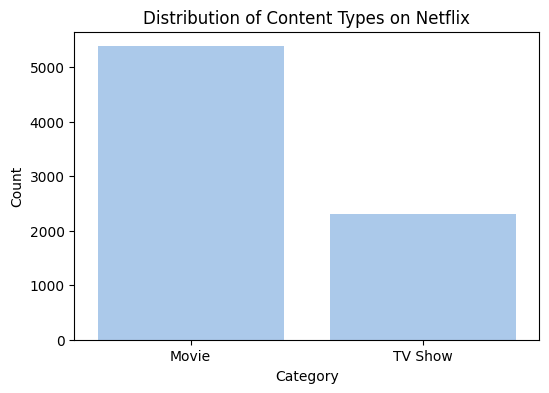

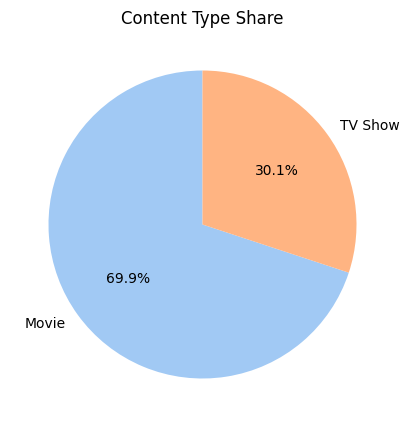

In [50]:
# Count of Movies vs TV Shows
type_counts = df['Category'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Distribution of Content Types on Netflix")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

# Percentage distribution
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(5,5), title='Content Type Share')
plt.ylabel("")
plt.show()

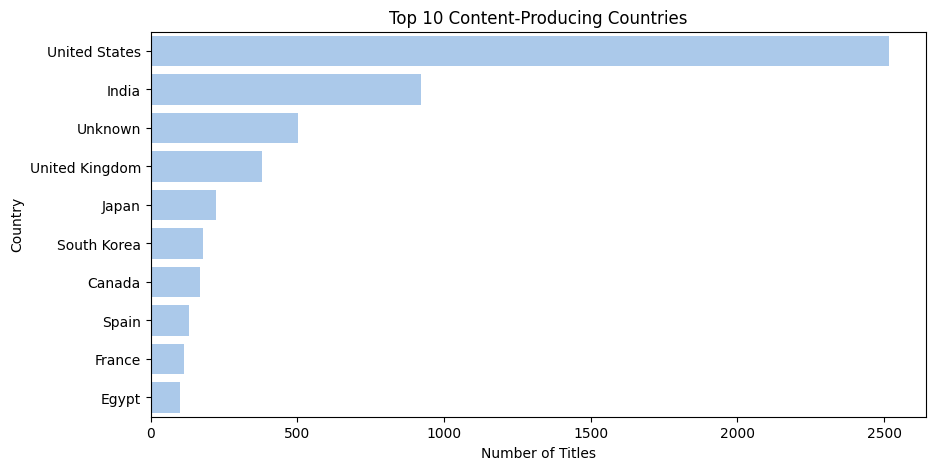

In [51]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

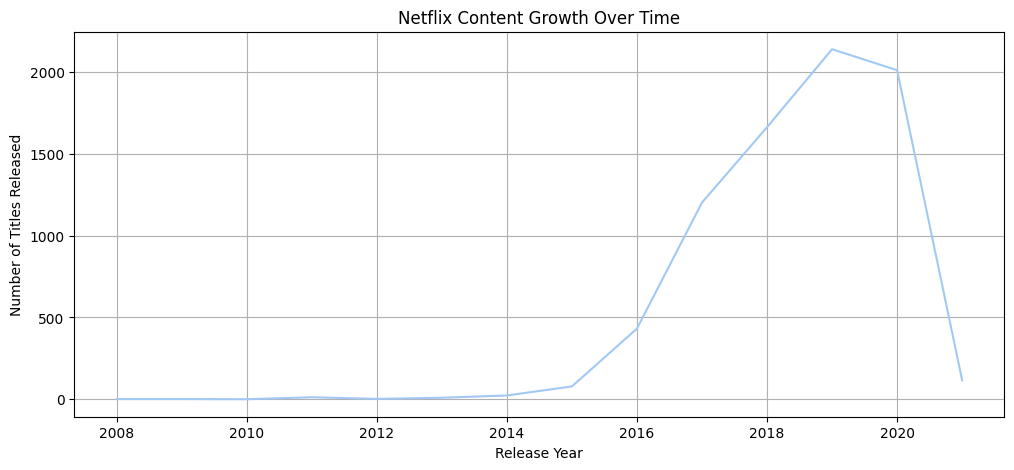

In [52]:
yearly_counts = df['Release_Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(True)
plt.show()

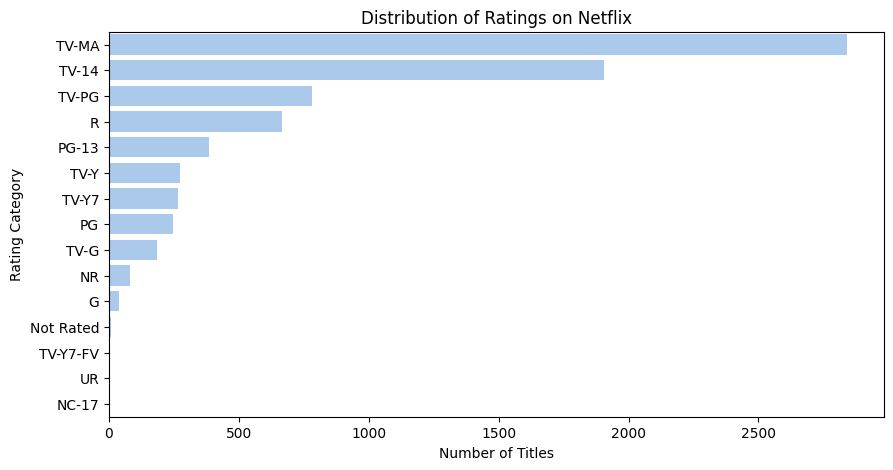

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating Category")
plt.show()

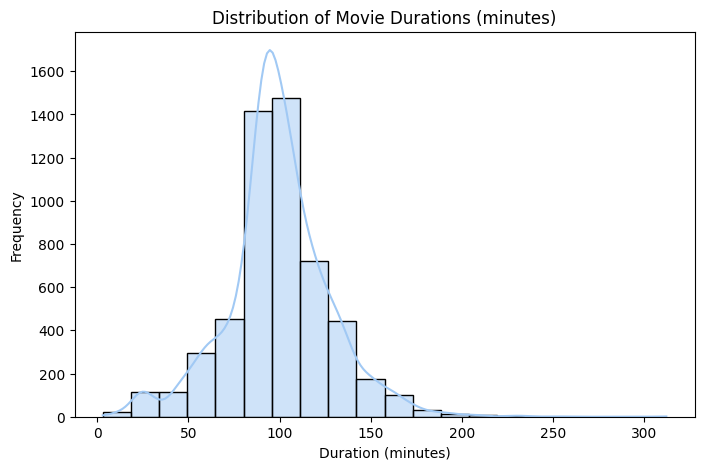

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Category']=="Movie"]['Duration_num'], bins=20, kde=True)
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

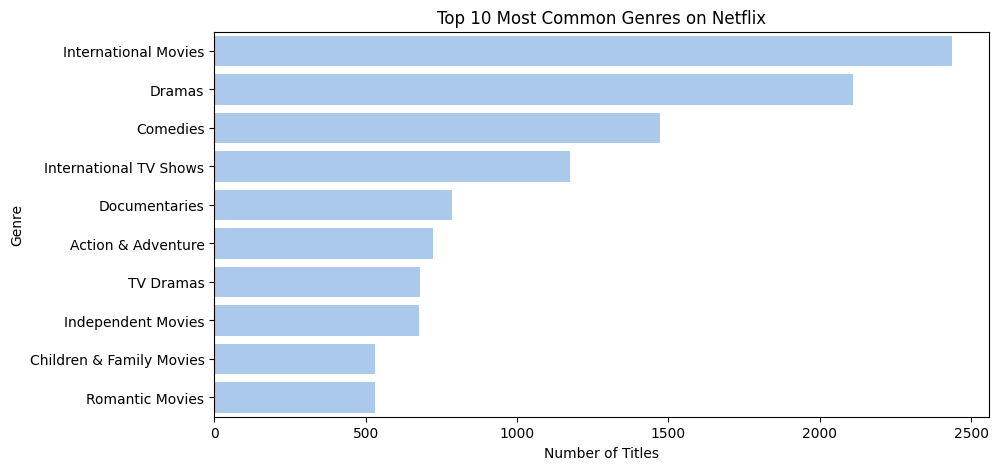

In [55]:
# The 'Type' column has comma-separated genres
from collections import Counter

# Flatten and count top genres
genre_list = df['Type'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
all_genres = [g for sublist in genre_list for g in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres))
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

## ✅ Phase 2 Summary: Key Insights

- **Movies dominate** Netflix’s library, though TV Shows are steadily growing.  
- **United States, India, and the UK** are the top content-producing countries.  
- **2010–2020** saw the largest surge in new releases.  
- **TV-MA** and **TV-14** are the most common ratings, indicating mature audience targeting.  
- **Dramas, Comedies, and Documentaries** are the most frequent genres.  

Next up: **Phase 3 — Statistical Insights & Predictive Modeling**  
We’ll apply some light statistical thinking and machine learning techniques to explore deeper relationships.